In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bihar_election_sample.csv")
df

,Constituency,District,Year,Total_Voters,Votes_Polled,Turnout_Percentage,Winning_Party,RunnerUp_Party,Winning_VoteShare_Percent,RunnerUp_VoteShare_Percent,Margin_Percent
0,Constituency_1,District_1,2020,202500,141836,70.04,INC,RJD,52.47,36.07,16.40
1,Constituency_2,District_1,2020,344539,332219,96.42,BJP,JDU,52.73,27.49,25.24
2,Constituency_3,District_1,2020,430953,301950,70.07,RJD,INC,44.76,41.47,3.29
3,Constituency_4,District_1,2020,447790,387078,86.44,BJP,LJP,44.78,31.29,13.49
4,Constituency_5,District_1,2020,259896,234102,90.08,LJP,RJD,36.63,29.35,7.28
5,Constituency_6,District_2,2020,400079,311321,77.81,INC,JDU,42.92,29.32,13.60
6,Constituency_7,District_2,2020,481123,331536,68.91,RJD,INC,40.40,21.73,18.68
7,Constituency_8,District_2,2020,428045,304554,71.15,RJD,JDU,43.14,28.93,14.20
8,Constituency_9,District_2,2020,353844,251526,71.08,LJP,BJP,42.60,30.60,12.00
9,Constituency_10,District_2,2020,346085,298478,86.24,INC,JDU,36.33,24.50,11.83


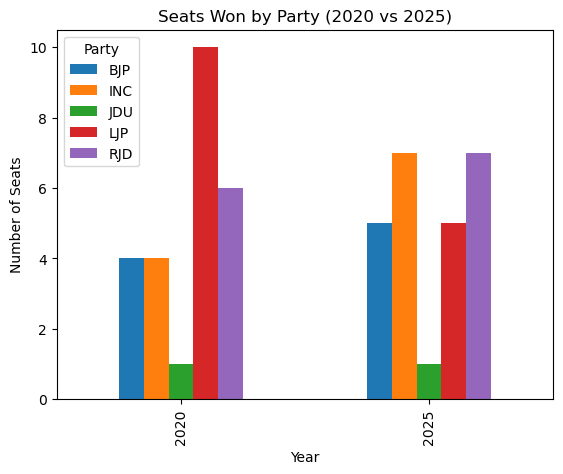

In [3]:
seat_count = df.groupby(["Year", "Winning_Party"])["Constituency"].count().unstack()

seat_count.plot(kind="bar")
plt.title("Seats Won by Party (2020 vs 2025)")
plt.xlabel("Year")
plt.ylabel("Number of Seats")
plt.legend(title="Party")
plt.show()

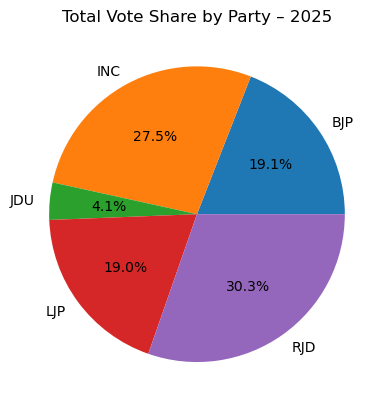

In [4]:
df_2025 = df[df["Year"] == 2025]

party_votes = df_2025.groupby("Winning_Party")["Winning_VoteShare_Percent"].sum()

party_votes.plot(kind="pie", autopct="%1.1f%%")
plt.title("Total Vote Share by Party – 2025")
plt.ylabel("")
plt.show()

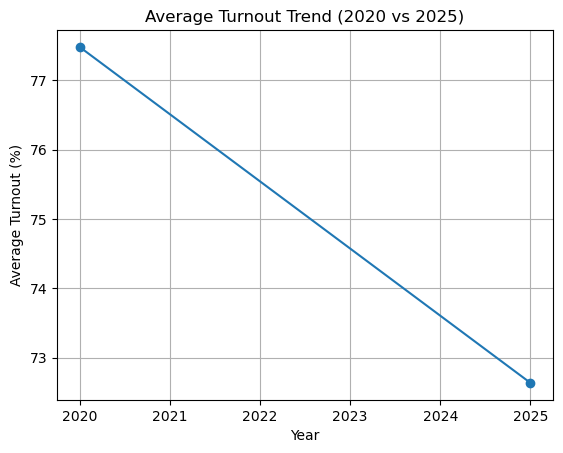

In [5]:
turnout_avg = df.groupby("Year")["Turnout_Percentage"].mean()

turnout_avg.plot(kind="line", marker="o")
plt.title("Average Turnout Trend (2020 vs 2025)")
plt.xlabel("Year")
plt.ylabel("Average Turnout (%)")
plt.grid(True)
plt.show()

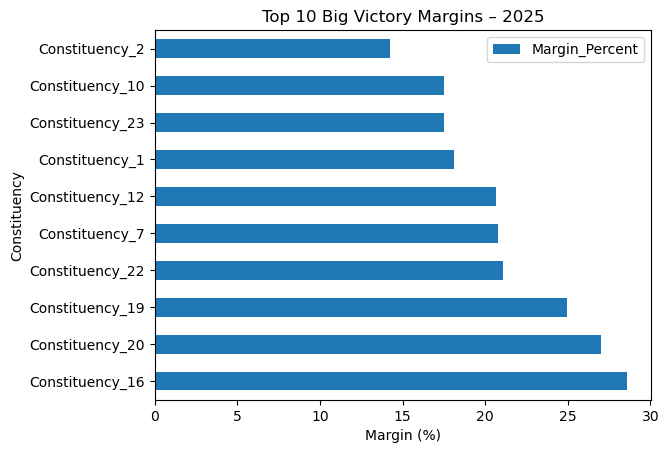

In [6]:
df_2025 = df[df["Year"] == 2025]

top_margin = df_2025.nlargest(10, "Margin_Percent")

top_margin.plot(
    x="Constituency", 
    y="Margin_Percent", 
    kind="barh"
)
plt.title("Top 10 Big Victory Margins – 2025")
plt.xlabel("Margin (%)")
plt.ylabel("Constituency")
plt.show()

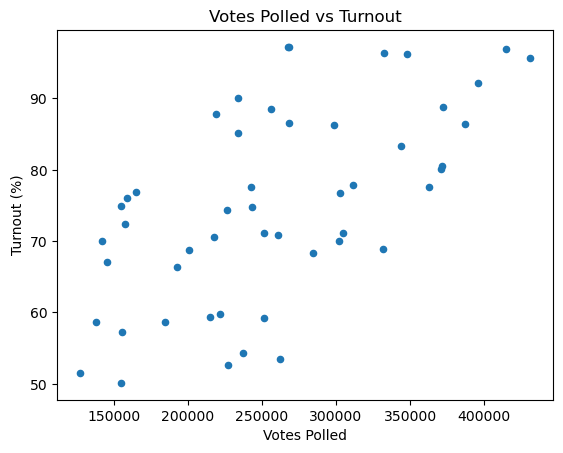

In [7]:
df.plot(kind="scatter", x="Votes_Polled", y="Turnout_Percentage")
plt.title("Votes Polled vs Turnout")
plt.xlabel("Votes Polled")
plt.ylabel("Turnout (%)")
plt.show()


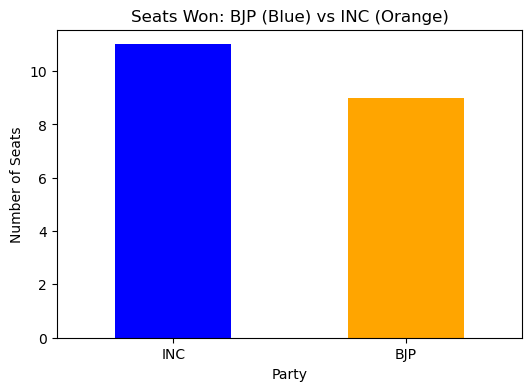

In [8]:
# Filter only BJP and INC wins
bjp_inc = df[df["Winning_Party"].isin(["BJP", "INC"])]

party_counts = bjp_inc["Winning_Party"].value_counts()

party_counts.plot(kind='bar', figsize=(6,4), color=['blue', 'orange'])
plt.title('Seats Won: BJP (Blue) vs INC (Orange)')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=0)
plt.show()


Top parties winning seats:
Winning_Party
LJP    15
RJD    13
INC    11
BJP     9
JDU     2
Name: count, dtype: int64

Average Turnout by Year:
Year
2020    77.4828
2025    72.6336
Name: Turnout_Percentage, dtype: float64

Summary statistics by district:
            Winning_VoteShare_Percent  RunnerUp_VoteShare_Percent
District                                                         
District_1                     44.177                      31.314
District_2                     41.469                      29.003
District_3                     45.563                      32.571
District_4                     49.427                      28.775
District_5                     46.657                      31.001



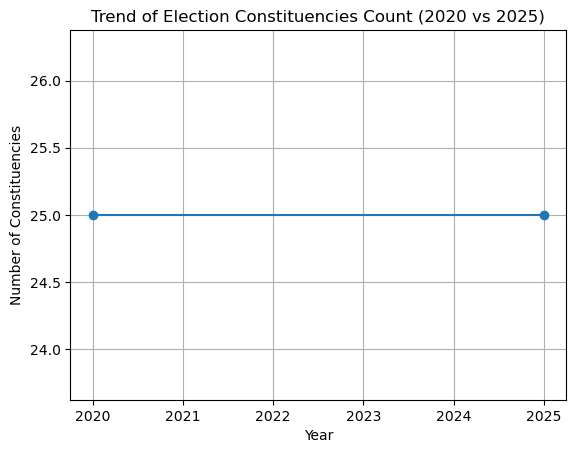

In [9]:
top_parties = df["Winning_Party"].value_counts().head(10)
print("Top parties winning seats:")
print(top_parties)
print()

# ----------------------------------------
# 2) Turnout comparison (2020 vs 2025)
# ----------------------------------------
turnout_by_year = df.groupby("Year")["Turnout_Percentage"].mean()
print("Average Turnout by Year:")
print(turnout_by_year)
print()

# ----------------------------------------
# 3) Summary statistics of vote share by district
# ----------------------------------------
summary_stats_by_district = df.groupby("District")[["Winning_VoteShare_Percent", "RunnerUp_VoteShare_Percent"]].mean()
print("Summary statistics by district:")
print(summary_stats_by_district)
print()

# ----------------------------------------
# 4) Trend of elections over years (number of constituencies)
# ----------------------------------------
election_trend = df.groupby("Year").size()
plt.plot(election_trend.index, election_trend.values, marker='o')
plt.title("Trend of Election Constituencies Count (2020 vs 2025)")
plt.xlabel("Year")
plt.ylabel("Number of Constituencies")
plt.grid(True)
plt.show()


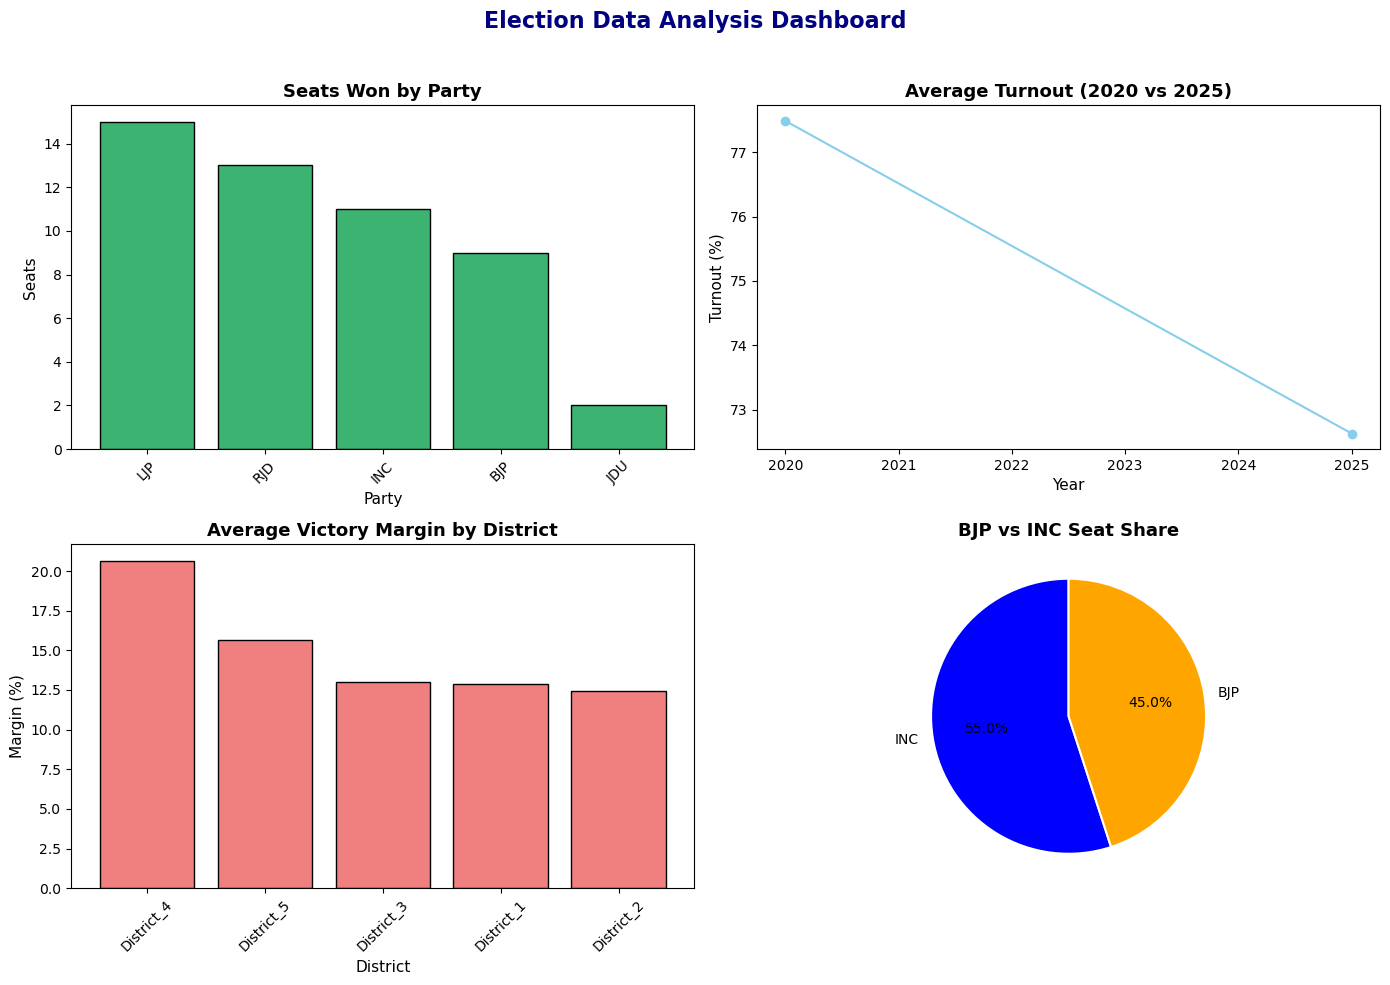

In [10]:
import matplotlib.pyplot as plt

# Prepare data
party_wins = df["Winning_Party"].value_counts()
year_turnout = df.groupby("Year")["Turnout_Percentage"].mean()
district_margins = df.groupby("District")["Margin_Percent"].mean().sort_values(ascending=False)
bjp_inc_votes = df[df["Winning_Party"].isin(["BJP", "INC"])]["Winning_Party"].value_counts()

# Create subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Election Data Analysis Dashboard", fontsize=16, fontweight="bold", color="navy")

# ------------------ Plot 1: Party Wins ------------------
axes[0, 0].bar(party_wins.index, party_wins.values, color='mediumseagreen', edgecolor='black')
axes[0, 0].set_title('Seats Won by Party', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Party', fontsize=11)
axes[0, 0].set_ylabel('Seats', fontsize=11)
axes[0, 0].tick_params(axis='x', rotation=45)

# ------------------ Plot 2: Turnout Over Years ------------------
axes[0, 1].plot(year_turnout.index, year_turnout.values, marker='o', color='skyblue')
axes[0, 1].set_title('Average Turnout (2020 vs 2025)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=11)
axes[0, 1].set_ylabel('Turnout (%)', fontsize=11)

# ------------------ Plot 3: Average Margin by District ------------------
axes[1, 0].bar(district_margins.index, district_margins.values, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Average Victory Margin by District', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('District', fontsize=11)
axes[1, 0].set_ylabel('Margin (%)', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)

# ------------------ Plot 4: BJP vs INC Pie ------------------
colors = ['blue', 'orange']  # BJP = blue, INC = orange
axes[1, 1].pie(
    bjp_inc_votes.values,
    labels=bjp_inc_votes.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
axes[1, 1].set_title('BJP vs INC Seat Share', fontsize=13, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
